In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../input/shopee-code-league-20/_DA_Marketing_Analytics/train.csv",index_col='row_id')

In [3]:
df.head()

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag
row_id,,,,,,,,,,,,,,,,,
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,9,23,69,1,3,6,0
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73539 entries, 0 to 73538
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country_code                 73539 non-null  int64 
 1   grass_date                   73539 non-null  object
 2   user_id                      73539 non-null  int64 
 3   subject_line_length          73539 non-null  int64 
 4   last_open_day                73539 non-null  object
 5   last_login_day               73539 non-null  object
 6   last_checkout_day            73539 non-null  object
 7   open_count_last_10_days      73539 non-null  int64 
 8   open_count_last_30_days      73539 non-null  int64 
 9   open_count_last_60_days      73539 non-null  int64 
 10  login_count_last_10_days     73539 non-null  int64 
 11  login_count_last_30_days     73539 non-null  int64 
 12  login_count_last_60_days     73539 non-null  int64 
 13  checkout_count_last_10_days  73

Almost all the columns are non-null and no missing values are present.

# Feature Engineering

Let's convert 'Never Open' into 0. For ease of analysis

In [5]:
df['last_open_day'] = df['last_open_day'].replace('Never open',0).astype(int)
df['last_login_day'] = df['last_login_day'].replace('Never login',0).astype(int)
df['last_checkout_day'] = df['last_checkout_day'].replace('Never checkout',0).astype(int)

Dropping features 'grass_date','subject_line_length' for convienience.

In [6]:
df = df.drop(['grass_date','subject_line_length','user_id'],axis=1)

In [7]:
df.describe()

,country_code,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag
count,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000
mean,2.533159,29.404819,53.133344,56.716191,0.911829,2.780457,5.019364,8.382287,25.284053,49.010430,0.909898,2.796040,5.420960,0.155781
std,1.675251,53.204310,344.584095,117.721606,1.754052,4.570239,7.902313,13.424436,37.853189,71.819327,2.887416,7.686064,13.980182,0.362650
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,12.000000,8.000000,12.000000,0.000000,1.000000,2.000000,3.000000,11.000000,22.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,33.000000,26.000000,51.000000,1.000000,3.000000,6.000000,12.000000,35.000000,69.000000,1.000000,3.000000,6.000000,0.000000
max,7.000000,808.000000,18141.000000,1445.000000,31.000000,92.000000,135.000000,254.000000,735.000000,1260.000000,157.000000,531.000000,783.000000,1.000000


# Data Visualisation

## Open_Flag distribution

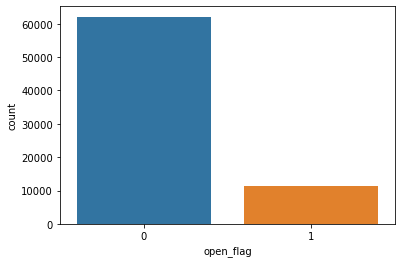

In [8]:
sns.countplot('open_flag',data=df)

The target variable is HIGHLY BIASED to 0. 

## Country

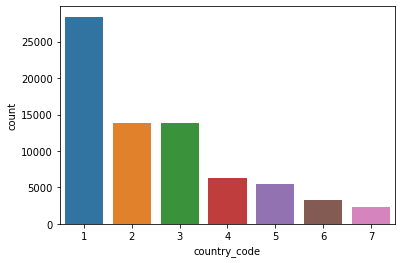

In [9]:
sns.countplot('country_code',data=df)

## Last Open day

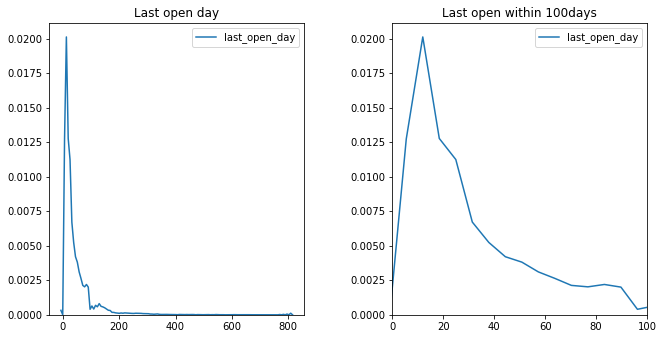

In [10]:
fig,(ax1,ax2) = plt.subplots(1,2)

xmax = df['last_open_day'].max()
xmin = df['last_open_day'].min()

plt.xlim((xmin,xmax))
sns.kdeplot(df['last_open_day'],ax=ax1)

sns.kdeplot(df['last_open_day'],ax=ax2)
ax2.set_xlim(0,100)

ax1.set_title('Last open day')
ax2.set_title('Last open within 100days')
fig.tight_layout()
fig.set_size_inches(10,5)

Most people open within 100 days. And within 100 days most people opens with as frequent as 20 days

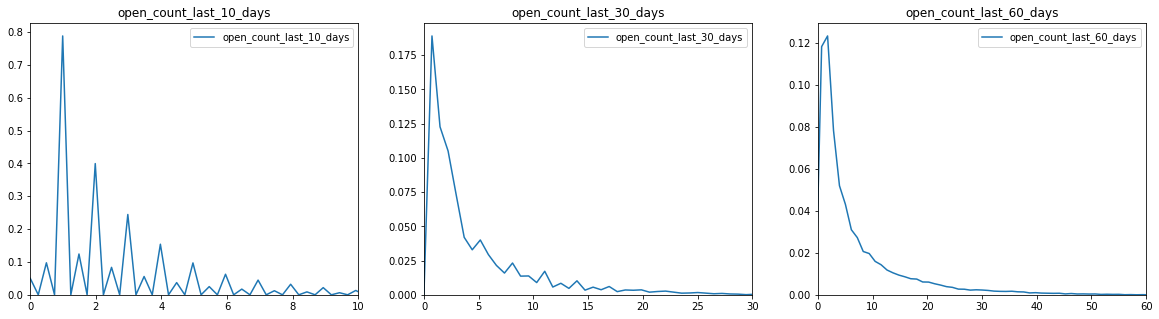

In [11]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3)

sns.kdeplot(df['open_count_last_10_days'],ax=ax1)
ax1.set_xlim(0,10)

sns.kdeplot(df['open_count_last_30_days'],ax=ax2)
ax2.set_xlim(0,30)

sns.kdeplot(df['open_count_last_60_days'],ax=ax3)
ax3.set_xlim(0,60)

ax1.set_title('open_count_last_10_days')
ax2.set_title('open_count_last_30_days')
ax3.set_title('open_count_last_60_days')
fig.set_size_inches(20,5)

From the graph one could conclude that, most people open with each other day. The density spiked most on day 1!!

## Last Login Day

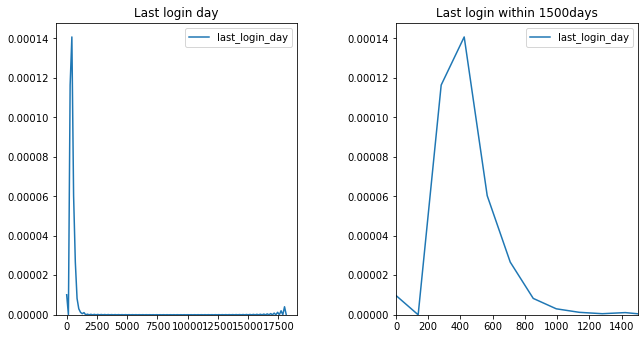

In [12]:
fig,(ax1,ax2) = plt.subplots(1,2)

xmax = df['last_login_day'].max()
xmin = df['last_login_day'].min()

plt.xlim((xmin,xmax))
sns.kdeplot(df['last_login_day'],ax=ax1)

sns.kdeplot(df['last_login_day'],ax=ax2)
ax2.set_xlim(0,1500)

ax1.set_title('Last login day')
ax2.set_title('Last login within 1500days')
fig.tight_layout()
fig.set_size_inches(10,5)

Most people login within 2000 days. And within 100 days most people login within 400-600 days

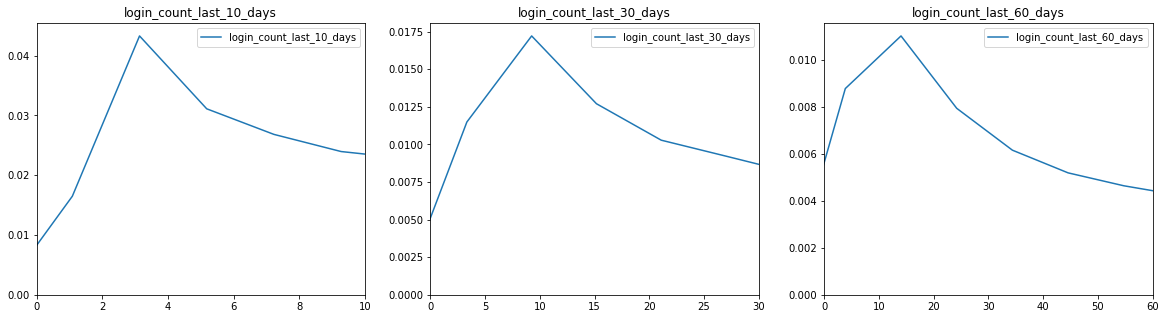

In [13]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3)

sns.kdeplot(df['login_count_last_10_days'],ax=ax1)
ax1.set_xlim(0,10)

sns.kdeplot(df['login_count_last_30_days'],ax=ax2)
ax2.set_xlim(0,30)

sns.kdeplot(df['login_count_last_60_days'],ax=ax3)
ax3.set_xlim(0,60)

ax1.set_title('login_count_last_10_days')
ax2.set_title('login_count_last_30_days')
ax3.set_title('login_count_last_60_days')
fig.set_size_inches(20,5)

The login density is pretty interesting. Within 10 days, most people login within every 3 days. But if one looks at a long range of days, most login happens every 15 to 30 days.

## Last Checkout Day

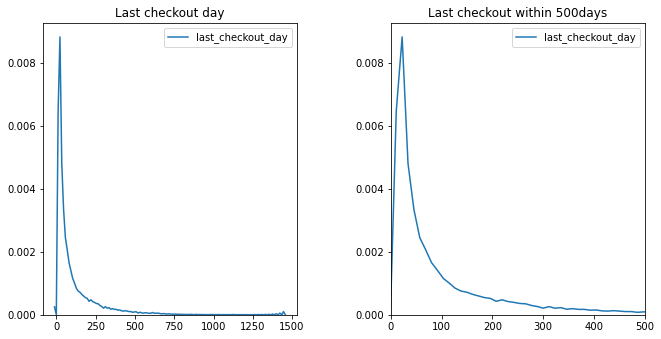

In [14]:
fig,(ax1,ax2) = plt.subplots(1,2)

xmax = df['last_checkout_day'].max()
xmin = df['last_checkout_day'].min()

plt.xlim((xmin,xmax))
sns.kdeplot(df['last_checkout_day'],ax=ax1)

sns.kdeplot(df['last_checkout_day'],ax=ax2)
ax2.set_xlim(0,500)

ax1.set_title('Last checkout day')
ax2.set_title('Last checkout within 500days')
fig.tight_layout()
fig.set_size_inches(10,5)

Last time a check out happens mostly within less than 100 days and very less with 300 to 500 days.

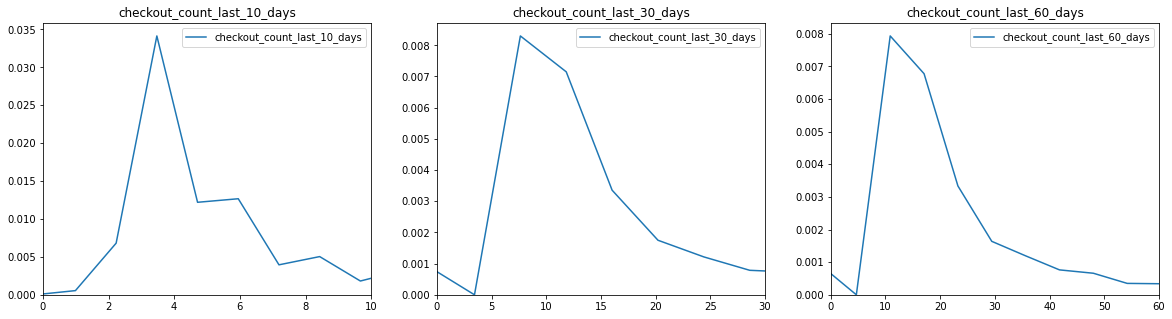

In [15]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3)

sns.kdeplot(df['checkout_count_last_10_days'],ax=ax1)
ax1.set_xlim(0,10)

sns.kdeplot(df['checkout_count_last_30_days'],ax=ax2)
ax2.set_xlim(0,30)

sns.kdeplot(df['checkout_count_last_60_days'],ax=ax3)
ax3.set_xlim(0,60)

ax1.set_title('checkout_count_last_10_days')
ax2.set_title('checkout_count_last_30_days')
ax3.set_title('checkout_count_last_60_days')
fig.set_size_inches(20,5)

Graphs infers that, within 10 days, most checkout happens every 3-4 days. And within 10-30 days for 60 days.

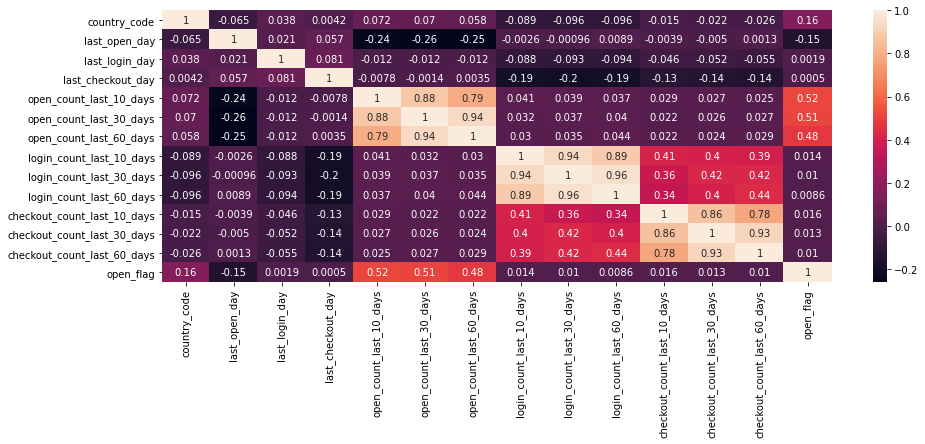

In [16]:
sns.heatmap(df.corr(),annot=True)
fig = plt.gcf()
fig.set_size_inches(15,5)

It seems like open_counts has more correlation with open_flag, than any other features.

# Model Building

Since the data contains more overlapping features, only considering last_open_day, last_login_day and last_checkout_day .

Extrating X and Y from the df.

In [17]:
Y = df['open_flag']
#Y = Y.values.reshape(-1,1)
X = df.drop(['open_count_last_10_days', 'open_count_last_30_days',
       'open_count_last_60_days', 'login_count_last_10_days',
       'login_count_last_30_days', 'login_count_last_60_days',
       'checkout_count_last_10_days', 'checkout_count_last_30_days',
       'checkout_count_last_60_days', 'open_flag'],axis=1)

## Classification Model 

## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
log_model = LogisticRegression()

In [20]:
log_model.fit(X,Y)

LogisticRegression()

In [21]:
log_model.score(X,Y)

0.84421871387971

Seems like we have a good model accuracy of 84%.

In [22]:
coeff_df = DataFrame(zip(X.columns,np.transpose(log_model.coef_)))
coeff_df

,0,1
0,country_code,[0.21433117052755302]
1,last_open_day,[-0.028683196060813744]
2,last_login_day,[6.508050679072888e-06]
3,last_checkout_day,[0.0002470296079924351]


This seems like higher the value of last_open_day lower the chance of Flag_open.
All other features are linearly related to the Flag_open.

In [23]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y)

print(f'Splitting happens as {x_train.shape},{x_test.shape},{y_train.shape},{y_test.shape}')

Splitting happens as (55154, 4),(18385, 4),(55154,),(18385,)


In [24]:
log_model2 = LogisticRegression(class_weight='balance')

log_model2.fit(x_train,y_train)

y_pred = log_model2.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

## Model Analysis

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8434593418547729

So, the model has predicted with an accuracy score of 84%

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
confusion_matrix(y_test,y_pred)

array([[15507,     0],
       [ 2878,     0]])

# SVM

In [28]:
from sklearn.svm import SVC

In [29]:
model = SVC()

In [30]:
clf = model.fit(x_train,y_train)

In [31]:
model.score(X,Y)

0.8442323121065013

In [32]:
y_pred = clf.predict(x_test)

## Model Analysis

In [33]:
accuracy_score(y_test,y_pred)

0.8434593418547729

In [34]:
confusion_matrix(y_test,y_pred)

array([[15507,     0],
       [ 2878,     0]])

Note that both Logistic Regression and SVM is predicting with similar accuracy score. But the biased data highly influence the model and unless a more unbiased data is acquired the model predictions are highly unreliable.